# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [13]:
df_select = df[["case_status", "class_of_admission","wage_offer_from_9089", "us_economic_sector"]]
df_select_subset = df_select.sample(n=10000)
df_select_subset

,case_status,class_of_admission,wage_offer_from_9089,us_economic_sector
85941,Certified-Expired,H-1B,NaN,Construction
252512,Certified-Expired,H-1B,110926.0,NaN
283137,Certified-Expired,H-1B,79660.0,NaN
224549,Certified-Expired,H-1B,81141.0,NaN
296424,Certified,H-1B,227178.0,NaN
...,...,...,...,...
87607,Certified,H-1B,NaN,Health Care
20098,Certified,L-1,107245.0,Advanced Mfg
25514,Certified-Expired,H-1B,NaN,IT
299687,Certified,E-2,70138.0,NaN


# 3.) Clean your data for a decision tree


In [19]:
X = df_select_subset.iloc[:,1:]
X = pd.get_dummies(X)
y = df_select_subset["case_status"]

# 4.) Fit and plot a decision tree of depth X


In [20]:
from sklearn import tree

In [21]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5555555555555556, 0.875, 'wage_offer_from_9089_72,467.00 <= 0.5\ngini = 0.599\nsamples = 10000\nvalue = [4805, 4038, 697, 460]'),
 Text(0.3333333333333333, 0.625, 'wage_offer_from_9089_81765.0 <= 0.5\ngini = 0.599\nsamples = 9928\nvalue = [4804, 3967, 697, 460]'),
 Text(0.2222222222222222, 0.375, 'wage_offer_from_9089_54,059.00 <= 0.5\ngini = 0.6\nsamples = 9867\nvalue = [4743, 3967, 697, 460]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.6\nsamples = 9826\nvalue = [4743, 3927, 697, 459]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 61\nvalue = [61, 0, 0, 0]'),
 Text(0.7777777777777778, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.027\nsamples = 72\nvalue = [1, 71, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.124\nsamples = 15\nvalue = [1, 14, 0, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 57\nvalue = [0, 57, 0, 0]')]

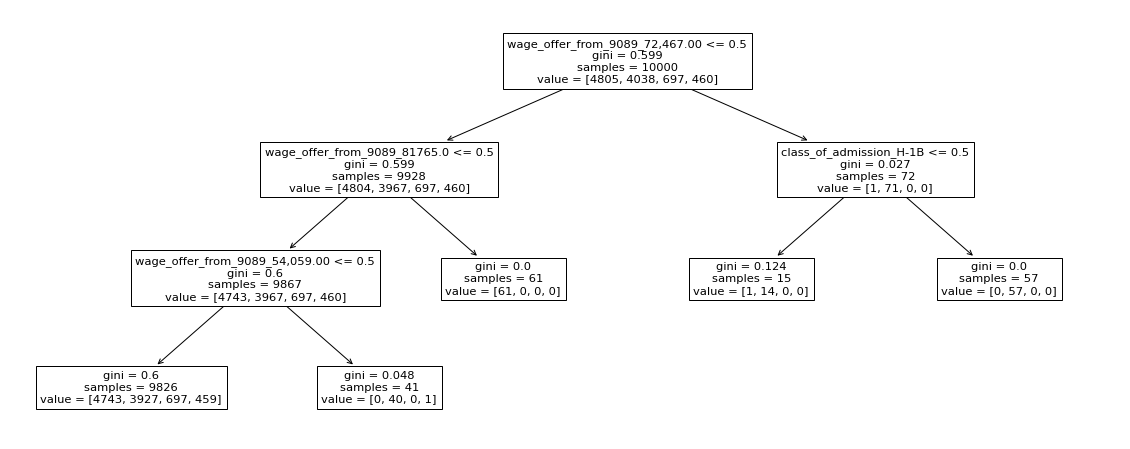

In [22]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node


If the wage offer is below 54,059.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [29]:
max_depths = [1,2,3]
outputs = []

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #... Train test split

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)
  oos_accuracy =  accuracy_score(y_test, y_pred) # CALCULATE Out of sample accuracy
  outputs.append(oos_accuracy)

outputs

[0.5075, 0.5075, 0.5115]

Best max-depth is 3.